# Simulacion de transito de vehiculos para la determinar los indices de contaminacion bajo distintos criterios de conduccion

Importamos librerias

In [113]:
import numpy as np
import emcee
import matplotlib.pyplot as plt
import scipy.stats as st
import math
from random import randint, uniform,random
import random
from random import choice
import csv

In [2]:
def puntosiniciales (nautos, tamcalles, ncalles, dursimu, duritera, aprom, velmax, espminimo):
    duracionsimulacion = dursimu
    duraciondeiteracion = duritera
    aceleracionpromedio = aprom
    x0 = []
    y0 = []
    a0 = []
    v0 = []    
    dir0 = []
    niteraciones = duracionsimulacion * 60 * (1 / duraciondeiteracion)
    s = (int(niteraciones + 1), nautos)
    ss = (3, 1)

    sequence1 = [1, 3]
    sequence2 = [2, 4]
    posicionx = np.zeros(s)
    posiciony = np.zeros(s)
    aceleracion = np.zeros(s)
    velocidad = np.zeros(s)
    direccion = np.zeros(s)
    tipodecalle = np.zeros(s)
    x = np.random.randint(1, ncalles, int(nautos/2))
    x = x * tamcalles
    y = np.random.rand(int(nautos/2))
    y = y * (ncalles * tamcalles )
    
    tamcaja = (ncalles + 1) * tamcalles
    vmax = velmax * (1 / 3600) * (1000) # Velocidad en m/s

    u = np.zeros(ss)
    ua = np.zeros(ss)
    ub = np.zeros(ss)

    for i in range(0, int(nautos/2)):
        x0.append(x[i])
        y0.append(y[i])
        dir0.append(choice(sequence1))
        v0.append(np.random.rand())
        a0.append(np.random.rand())
        
    y2 = np.random.randint(1, ncalles, int(nautos/2))
    y2 = y2 * tamcalles
    x2 = np.random.rand(int(nautos/2))
    x2 = x2 * (ncalles * tamcalles )

    for i in range(0, int(nautos/2)):
        x0.append(x2[i])
        y0.append(y2[i])
        dir0.append(choice(sequence2))
        v0.append(np.random.rand())
        a0.append(np.random.rand())
               
    return x0, y0, v0, a0, dir0

In [39]:
# Parametros iniciales

tamcalles = 50
nautos = 200
ncalles = 10 # No mover de 20
dursimu = 1 # minuto
duritera = 0.2 # segs
duraciondeiteracion = duritera
aprom = 1 # m/s2
espminimo = 6 # m
vmax = 60 # km/h
aceleracionpromedio=1

niteraciones = dursimu * 60 * (1 / duritera)

posicionx = np.arange(niteraciones*nautos)
posiciony = np.arange(niteraciones*nautos)
velocidad = np.arange(niteraciones*nautos)
aceleracion = np.arange(niteraciones*nautos)
direccion = np.arange(niteraciones*nautos)
tipodecalle = np.arange(niteraciones*nautos)

posicionx.shape = (int(niteraciones),int(nautos))
posiciony.shape = (int(niteraciones),int(nautos))
velocidad.shape = (int(niteraciones),int(nautos))
aceleracion.shape = (int(niteraciones),int(nautos))
direccion.shape = (int(niteraciones),int(nautos))
tipodecalle.shape = (int(niteraciones),int(nautos))

x0, y0, v0, a0, dir0 = puntosiniciales (nautos, tamcalles, ncalles, dursimu, duritera, aprom, vmax, espminimo)

for i in range(0, int(nautos)-1):
    posicionx[0][i] = x0[i]
    posiciony[0][i] = y0[i]
    direccion[0][i] = dir0[i]
    velocidad[0][i] = v0[i]
    aceleracion[0][i] = a0[i]

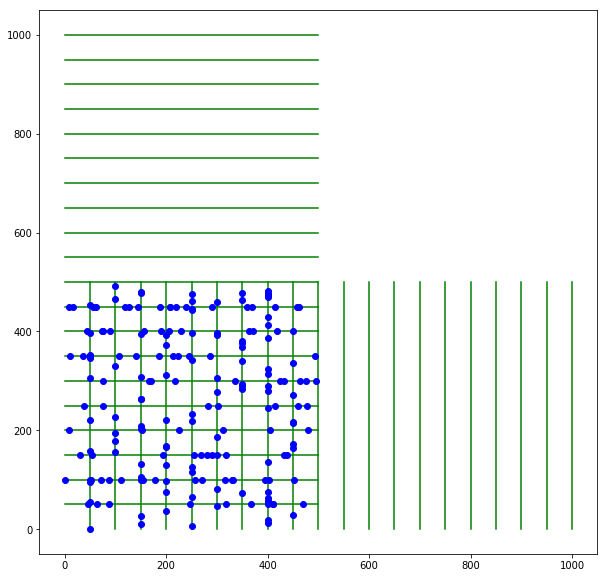

In [40]:

x1 = np.linspace(0, tamcalles * ncalles, 2)
y1 = [tamcalles, tamcalles]
y2 = [tamcalles*2, tamcalles*2]
y3 = [tamcalles*3, tamcalles*3]
y4 = [tamcalles*4, tamcalles*4]
y5 = [tamcalles*5, tamcalles*5]
y6 = [tamcalles*6, tamcalles*6]
y7 = [tamcalles*7, tamcalles*7]
y8 = [tamcalles*8, tamcalles*8]
y9 = [tamcalles*9, tamcalles*9]
y10 = [tamcalles*10, tamcalles*10]
y11 = [tamcalles*11, tamcalles*11]
y12 = [tamcalles*12, tamcalles*12]
y13 = [tamcalles*13, tamcalles*13]
y14 = [tamcalles*14, tamcalles*14]
y15 = [tamcalles*15, tamcalles*15]
y16 = [tamcalles*16, tamcalles*16]
y17 = [tamcalles*17, tamcalles*17]
y18 = [tamcalles*18, tamcalles*18]
y19 = [tamcalles*19, tamcalles*19]
y20 = [tamcalles*20, tamcalles*20]

plt.figure(figsize=(10, 10))
plt.plot(x1,y1, color = 'g')
plt.plot(x1,y2, color = 'g')
plt.plot(x1,y3, color = 'g')
plt.plot(x1,y4, color = 'g')
plt.plot(x1,y5, color = 'g')
plt.plot(x1,y6, color = 'g')
plt.plot(x1,y7, color = 'g')
plt.plot(x1,y8, color = 'g')
plt.plot(x1,y9, color = 'g')
plt.plot(x1,y10, color = 'g')
plt.plot(x1,y11, color = 'g')
plt.plot(x1,y12, color = 'g')
plt.plot(x1,y13, color = 'g')
plt.plot(x1,y14, color = 'g')
plt.plot(x1,y15, color = 'g')
plt.plot(x1,y16, color = 'g')
plt.plot(x1,y17, color = 'g')
plt.plot(x1,y18, color = 'g')
plt.plot(x1,y19, color = 'g')
plt.plot(x1,y20, color = 'g')

plt.plot(y1,x1, color = 'g')
plt.plot(y2,x1, color = 'g')
plt.plot(y3,x1, color = 'g')
plt.plot(y4,x1, color = 'g')
plt.plot(y5,x1, color = 'g')
plt.plot(y6,x1, color = 'g')
plt.plot(y7,x1, color = 'g')
plt.plot(y8,x1, color = 'g')
plt.plot(y9,x1, color = 'g')
plt.plot(y10,x1, color = 'g')
plt.plot(y11,x1, color = 'g')
plt.plot(y12,x1, color = 'g')
plt.plot(y13,x1, color = 'g')
plt.plot(y14,x1, color = 'g')
plt.plot(y15,x1, color = 'g')
plt.plot(y16,x1, color = 'g')
plt.plot(y17,x1, color = 'g')
plt.plot(y18,x1, color = 'g')
plt.plot(y19,x1, color = 'g')
plt.plot(y20,x1, color = 'g')

plt.plot(x0,y0, "bo")

In [41]:
tamcaja = tamcalles*ncalles
u=[]
ua=[]
ub=[]
  
for i in range(0, int(niteraciones-1)):
    for j in range(0, int(nautos-1)):
        if ((direccion[i][j] == 1 or direccion[i][j]==3 ) and posicionx[i][j]==tamcalles*10):
            tipodecalle[i][j]=1
        if (direccion[i][j] == 1 or direccion[i][j]==3 ) and posicionx[i][j]!=tamcalles*10:
             tipodecalle[i][j]=2
        if (direccion[i][j] == 2 or direccion[i][j]==4 ) and posiciony[i][j]==tamcalles*10:
            tipodecalle[i][j]=1
        if (direccion[i][j] == 2 or direccion[i][j]==4 ) and posiciony[i][j]!=tamcalles*10:
             tipodecalle[i][j]=2
        if velocidad[i][j] <= 0:
            velocidad[i][j] = 0
        if velocidad[i][j] > vmax:
            velocidad[i][j] = vmax
        
########################################################################################################        
        if direccion[i][j] == 1: # SI EL AUTO SE MUEVE ENDIRECCION NORTE
            u=np.array([tamcalles*100,0,0])
            ua=np.array([tamcalles*100,0,0])
            ub=np.array([tamcalles*100,0,0])  
            
            for k in range(0, int(nautos)): # DISTANCIA CIRCULAR
                if direccion[i][k] == 2: # verificar que esten en direcciones perpendiculares(VER. DIRECCION ESTE)
                    if posiciony[i][k] - posiciony[i][j] > 0: # verificar que esten cerca hacia arriba
                        if posiciony[i][k] - posiciony[i][j] < 10: # verificar que se encuentre al menos a 10 m hacia arriba
                            if posicionx[i][j]-posicionx[i][k] < 7: # verificar que esten al menos 7 m separados horizontalmente
                                if posicionx[i][j]-posicionx[i][k] > 0:
                                    ua[1] = posicionx[i][j] - posicionx[i][k] # guardar el valor de esa distancia de lado
                                    if ua[1] <= ua[0]: # verificar que esa distancia sea menor que la iteracion pasada
                                        ua[0] = ua[1] #  la distancia menor se va  guardando en ua(1,1)
                                        ua[2] = posiciony[i][k]-posiciony[i][j]
                if direccion[i][k] == 4: #verificar que esten en direcciones perpendiculares (VER. DIRECCION OESTE)
                    if posiciony[i][k]-posiciony[i][j]>0: #verificar que esten cerca hacia arriba
                        if posiciony[i][k]-posiciony[i][j]<10: # verificar que se encuentre al menos a 10 m hacia arriba
                            if posicionx[i][k]-posicionx[i][j]<7: #verificar que esten al menos 7 m separados horizontalmente
                                if posicionx[i][k]-posicionx[i][j]>0: #
                                    ub[1]=posicionx[i][k]-posicionx[i][j]# guardar el valor de esa distancia de lado
                                    if ub[1]<ub[0]: #verificar que esa distancia sea menor que la iteracion pasada
                                        ub[0]=ub[1] # la distancia menor se va  guardando en ub(1,1)
                                        ub[2]=posiciony[i][k]-posiciony[i][j] #la distancia vertical entre los autos se guarda
                                

            for k in range(0, int(nautos)):     #DETERMINAR DISTANCIA DE AUTO DE FRENTE
                if direccion[i][k] == 1: # verificar cuales estan en la misma direccion
                    if abs(posicionx[i][j] - posicionx[i][k]) < 0.1 : #verificar que esten en la misma coordenada X
                        if posiciony[i][k] - posiciony[i][j] > 0: #verificar que se encuentre en frente
                            u[1]=posiciony[i][k] - posiciony[i][j]
                            if [1]<= u[0] and u[1] > 0:
                                u[0]=u[1]
                                u[2]=velocidad[i][k]
            
            distanciacirculo=min(ua[0],ub[0])
            
            if distanciacirculo<0:
                distanciacirculo =100
            if min(ua[0],ub[0])== ua[0]:
                ud= ua[2]
            if min(ua[0],ub[0])== ub[0]:
                ud= ub[2]
                
            distanciafrente=u[1]         
            distanciaesquina=tamcalles-np.mod(posiciony[i][j],tamcalles)
            er=i
            posiciony[i+1][j]=posiciony[i][j]+velocidad[i][j]*duraciondeiteracion+(aceleracion[i][j]*duraciondeiteracion**2)/2
                    
            if posiciony[i+1][j]<posiciony[i][j]:
                posiciony[i+1][j]=posiciony[i][j]
                
            if posiciony[i+1][j]>=tamcaja:
                posiciony[i+1][j]=0
            if posiciony[i+1][j]<=0:
                posiciony[i+1][j]=tamcaja    
            
            posicionx[i+1][j]=posicionx[i][j]
            
            if tipodecalle[i][j]==1 :
                if distanciafrente<espminimo :
                    velocidad[i+1][j]=u[2]
                    aceleracion[i+1][j]=0
                if distanciafrente>=espminimo :
                    aceleracion[i+1][j]=aceleracionpromedio
                    velocidad[i+1][j]=velocidad[i][j]+aceleracionpromedio*duraciondeiteracion

            if tipodecalle[i][j]==2 :
                if min(distanciacirculo,distanciafrente)==distanciafrente :
                    if distanciafrente<espminimo :
                        velocidad[i+1][j]=u[2]
                        aceleracion[i+1][j]=0
                    if distanciafrente>=espminimo :
                        aceleracion[i+1][j]=aceleracionpromedio
                        velocidad[i+1][j]=velocidad[i][j]+aceleracionpromedio*duraciondeiteracion

                if min(distanciacirculo,distanciafrente)== distanciacirculo :
                    if distanciaesquina<=14 and distanciaesquina >5 :
                        aceleracion[i+1][j]=aceleracionpromedio*(-.5)
                        velocidad[i+1][j]=velocidad[i][j]+ aceleracion[i+1][j]*duraciondeiteracion
                  
                    if distanciaesquina<=5 and distanciaesquina >3 :
                        aceleracion[i+1][j]=aceleracionpromedio*(-2)
                        velocidad[i+1][j]=velocidad[i][j]+ aceleracion[i+1][j]*duraciondeiteracion
                  
                    if distanciaesquina<=3 and distanciaesquina >.5 :
                        aceleracion[i+1][j]=aceleracionpromedio*(-4)
                        velocidad[i+1][j]=velocidad[i][j]+ aceleracion[i+1][j]*duraciondeiteracion
                  
                    if distanciaesquina<=.5 and distanciaesquina >0 :
                        aceleracion[i+1][j]=0
                        velocidad[i+1][j]=0
                  
            direccion[i+1][j]=direccion[i][j]
            if distanciaesquina<0.5 :
                m=np.random.rand()
                if m>=.5 :
                    direccion[i+1][j]= 1
                    posicionx[i+1][j]=posicionx[i][j]
              
                if m<.5 and m>=.25 :
                    direccion[i+1][j]= 2
                    posicionx[i+1][j]=posicionx[i][j]
                    posiciony[i+1][j]=int((np.mod(posiciony[i][j],1)-1)*(-1)+posiciony[i][j])
                    velocidad[i+1][j]=2
              
                if m<.25 and m>=0 :
                    direccion[i+1][j]= 4
                    posicionx[i+1][j]=posicionx[i][j]
                    posiciony[i+1][j]=int((np.mod(posiciony[i][j],1)-1)*(-1)+posiciony[i][j])
                    velocidad[i+1][j]=2
                    
########################################################################################################        
        if direccion[i][j] == 3: # SI EL AUTO SE MUEVE ENDIRECCION SUR
            u=np.array([tamcalles*100,0,0])
            ua=np.array([tamcalles*100,0,0])
            ub=np.array([tamcalles*100,0,0])
            
            for k in range(0, int(nautos)): # DISTANCIA CIRCULAR
                if direccion[i][k] == 2: # verificar que esten en direcciones perpendiculares(VER. DIRECCION ESTE)
                    if posiciony[i][j] - posiciony[i][k] > 0: # verificar que esten cerca hacia arriba
                        if posiciony[i][j] - posiciony[i][k] < 10: # verificar que se encuentre al menos a 10 m hacia arriba
                            if posicionx[i][j]-posicionx[i][k] < 7: # verificar que esten al menos 7 m separados horizontalmente
                                if posicionx[i][j]-posicionx[i][k] > 0:
                                    ua[1] = posicionx[i][j] - posicionx[i][k] # guardar el valor de esa distancia de lado
                                    if ua[1] <= ua[0]: # verificar que esa distancia sea menor que la iteracion pasada
                                        ua[0] = ua[1] #  la distancia menor se va  guardando en ua(1,1)
                                        ua[2] = -posiciony[i][k]+posiciony[i][j]
                if direccion[i][k] == 4: #verificar que esten en direcciones perpendiculares (VER. DIRECCION OESTE)
                    if posiciony[i][j]-posiciony[i][k]>0: #verificar que esten cerca hacia arriba
                        if posiciony[i][j]-posiciony[i][k]<10: # verificar que se encuentre al menos a 10 m hacia arriba
                            if posicionx[i][k]-posicionx[i][j]<7: #verificar que esten al menos 7 m separados horizontalmente
                                if posicionx[i][k]-posicionx[i][j]>0: #
                                    ub[1]=posicionx[i][k]-posicionx[i][j]# guardar el valor de esa distancia de lado
                                    if ub[1]<ub[0]: #verificar que esa distancia sea menor que la iteracion pasada
                                        ub[0]=ub[1] # la distancia menor se va  guardando en ub(1,1)
                                        ub[2]=-posiciony[i][k]+posiciony[i][j] #la distancia vertical entre los autos se guarda
                                

            for k in range(0, int(nautos)):     #DETERMINAR DISTANCIA DE AUTO DE FRENTE
                if direccion[i][k] == 3: # verificar cuales estan en la misma direccion
                    if abs(posicionx[i][k] - posicionx[i][j]) < 0.1 : #verificar que esten en la misma coordenada X
                        if posiciony[i][j] - posiciony[i][k] > 0: #verificar que se encuentre en frente
                            u[1]=posiciony[i][j] - posiciony[i][k]
                            if [1]<= u[0] and u[1] > 0:
                                u[0]=u[1]
                                u[2]=velocidad[i][k]
            
            distanciacirculo=min(ua[0],ub[0])
            
            if distanciacirculo<0:
                distanciacirculo =100
            if min(ua[0],ub[0])== ua[0]:
                ud= ua[2]
            if min(ua[0],ub[0])== ub[0]:
                ud= ub[2]
                
            distanciafrente=u[1]         
            distanciaesquina=np.mod(posiciony[i][j],tamcalles)
            er=i
            posiciony[i+1][j]=posiciony[i][j]-(velocidad[i][j]*duraciondeiteracion+(aceleracion[i][j]*duraciondeiteracion**2)/2)
                    
            if posiciony[i+1][j]>posiciony[i][j]:
                posiciony[i+1][j]=posiciony[i][j]
                
            if posiciony[i+1][j]>=tamcaja:
                posiciony[i+1][j]=0
            if posiciony[i+1][j]<=0:
                posiciony[i+1][j]=tamcaja    
            
            posicionx[i+1][j]=posicionx[i][j]
            
            if tipodecalle[i][j]==1 :
                if distanciafrente<espminimo :
                    velocidad[i+1][j]=u[2]
                    aceleracion[i+1][j]=0
                if distanciafrente>=espminimo :
                    aceleracion[i+1][j]=aceleracionpromedio
                    velocidad[i+1][j]=velocidad[i][j]+aceleracionpromedio*duraciondeiteracion

            if tipodecalle[i][j]==2 :
                if min(distanciacirculo,distanciafrente)==distanciafrente :
                    if distanciafrente<espminimo :
                        velocidad[i+1][j]=u[2]
                        aceleracion[i+1][j]=0
                    if distanciafrente>=espminimo :
                        aceleracion[i+1][j]=aceleracionpromedio
                        velocidad[i+1][j]=velocidad[i][j]+aceleracionpromedio*duraciondeiteracion

                if min(distanciacirculo,distanciafrente)== distanciacirculo :
                    if distanciaesquina<=14 and distanciaesquina >5 :
                        aceleracion[i+1][j]=aceleracionpromedio*(-.5)
                        velocidad[i+1][j]=velocidad[i][j]+ aceleracion[i+1][j]*duraciondeiteracion
                  
                    if distanciaesquina<=5 and distanciaesquina >3 :
                        aceleracion[i+1][j]=aceleracionpromedio*(-2)
                        velocidad[i+1][j]=velocidad[i][j]+ aceleracion[i+1][j]*duraciondeiteracion
                  
                    if distanciaesquina<=3 and distanciaesquina >.5 :
                        aceleracion[i+1][j]=aceleracionpromedio*(-4)
                        velocidad[i+1][j]=velocidad[i][j]+ aceleracion[i+1][j]*duraciondeiteracion
                  
                    if distanciaesquina<=.5 and distanciaesquina >0 :
                        aceleracion[i+1][j]=0
                        velocidad[i+1][j]=0
                  
            direccion[i+1][j]=direccion[i][j]
            if distanciaesquina<0.5 :
                m=np.random.rand()
                if m>=.5 :
                    direccion[i+1][j]= 3
                    posicionx[i+1][j]=posicionx[i][j]
              
                if m<.5 and m>=.25 :
                    direccion[i+1][j]= 2
                    posicionx[i+1][j]=posicionx[i][j]
                    posiciony[i+1][j]=int(posiciony[i][j]-(np.mod(posiciony[i][j],tamcalles)-1))
                    velocidad[i+1][j]=2
              
                if m<.25 and m>=0 :
                    direccion[i+1][j]= 4
                    posicionx[i+1][j]=posicionx[i][j]
                    posiciony[i+1][j]=int(posiciony[i][j]-(np.mod(posiciony[i][j],tamcalles)-1))
                    velocidad[i+1][j]=2

########################################################################################################        
        if direccion[i][j] == 2: # SI EL AUTO SE MUEVE ENDIRECCION ESTE
            u=np.array([tamcalles*100,0,0])
            ua=np.array([tamcalles*100,0,0])
            ub=np.array([tamcalles*100,0,0])  
            
            for k in range(0, int(nautos)): # DISTANCIA CIRCULAR
                if direccion[i][k] == 1: # verificar que esten en direcciones perpendiculares(VER. DIRECCION ESTE)
                    if posicionx[i][k] - posicionx[i][j] > 0: # verificar que esten cerca hacia derecha
                        if posicionx[i][k] - posicionx[i][j] < 10: # verificar que se encuentre al menos a 10 m hacia derecha
                            if posiciony[i][j]-posiciony[i][k] < 7: # verificar que esten al menos 7 m separados verticalmente
                                if posiciony[i][j]-posiciony[i][k] > 0:
                                    ua[1] = posiciony[i][j] - posiciony[i][k] # guardar el valor de esa distancia de lado
                                    if ua[1] <= ua[0]: # verificar que esa distancia sea menor que la iteracion pasada
                                        ua[0] = ua[1] #  la distancia menor se va  guardando en ua(1,1)
                                        ua[2] = posicionx[i][k]-posicionx[i][j]
                if direccion[i][k] == 3: #verificar que esten en direcciones perpendiculares (VER. DIRECCION OESTE)
                    if posicionx[i][k]-posicionx[i][j]>0: #verificar que esten cerca hacia arriba
                        if posicionx[i][k]-posicionx[i][j]<10: # verificar que se encuentre al menos a 10 m hacia arriba
                            if posiciony[i][k]-posiciony[i][j]<7: #verificar que esten al menos 7 m separados horizontalmente
                                if posiciony[i][k]-posiciony[i][j]>0: #
                                    ub[1]=posiciony[i][k]-posiciony[i][j]# guardar el valor de esa distancia de lado
                                    if ub[1]<ub[0]: #verificar que esa distancia sea menor que la iteracion pasada
                                        ub[0]=ub[1] # la distancia menor se va  guardando en ub(1,1)
                                        ub[2]=posicionx[i][k]-posicionx[i][j] #la distancia vertical entre los autos se guarda
                                

            for k in range(0, int(nautos)):     #DETERMINAR DISTANCIA DE AUTO DE FRENTE
                if direccion[i][k] == 2: # verificar cuales estan en la misma direccion
                    if abs(posiciony[i][j] - posiciony[i][k]) < 0.1 : #verificar que esten en la misma coordenada X
                        if posicionx[i][k] - posicionx[i][j] > 0: #verificar que se encuentre en frente
                            u[1]=posicionx[i][k] - posicionx[i][j]
                            if [1]<= u[0] and u[1] > 0:
                                u[0]=u[1]
                                u[2]=velocidad[i][k]
            
            distanciacirculo=min(ua[0],ub[0])
            
            if distanciacirculo<0:
                distanciacirculo =100
            if min(ua[0],ub[0])== ua[0]:
                ud= ua[2]
            if min(ua[0],ub[0])== ub[0]:
                ud= ub[2]
                
            distanciafrente=u[1]         
            distanciaesquina=tamcalles-np.mod(posicionx[i][j],tamcalles)
            er=i
            posicionx[i+1][j]=posicionx[i][j]+velocidad[i][j]*duraciondeiteracion+(aceleracion[i][j]*duraciondeiteracion**2)/2
                    
            if posicionx[i+1][j]<posicionx[i][j]:
                posicionx[i+1][j]=posicionx[i][j]
                
            if posicionx[i+1][j]>=tamcaja:
                posicionx[i+1][j]=0
            if posicionx[i+1][j]<=0:
                posicionx[i+1][j]=tamcaja    
            
            posiciony[i+1][j]=posiciony[i][j]
            
            if tipodecalle[i][j]==1 :
                if distanciafrente<espminimo :
                    velocidad[i+1][j]=u[2]
                    aceleracion[i+1][j]=0
                if distanciafrente>=espminimo :
                    aceleracion[i+1][j]=aceleracionpromedio
                    velocidad[i+1][j]=velocidad[i][j]+aceleracionpromedio*duraciondeiteracion

            if tipodecalle[i][j]==2 :
                if min(distanciacirculo,distanciafrente)==distanciafrente :
                    if distanciafrente<espminimo :
                        velocidad[i+1][j]=u[2]
                        aceleracion[i+1][j]=0
                    if distanciafrente>=espminimo :
                        aceleracion[i+1][j]=aceleracionpromedio
                        velocidad[i+1][j]=velocidad[i][j]+aceleracionpromedio*duraciondeiteracion

                if min(distanciacirculo,distanciafrente)== distanciacirculo :
                    if distanciaesquina<=14 and distanciaesquina >5 :
                        aceleracion[i+1][j]=aceleracionpromedio*(-.5)
                        velocidad[i+1][j]=velocidad[i][j]+ aceleracion[i+1][j]*duraciondeiteracion
                  
                    if distanciaesquina<=5 and distanciaesquina >3 :
                        aceleracion[i+1][j]=aceleracionpromedio*(-2)
                        velocidad[i+1][j]=velocidad[i][j]+ aceleracion[i+1][j]*duraciondeiteracion
                  
                    if distanciaesquina<=3 and distanciaesquina >.5 :
                        aceleracion[i+1][j]=aceleracionpromedio*(-4)
                        velocidad[i+1][j]=velocidad[i][j]+ aceleracion[i+1][j]*duraciondeiteracion
                  
                    if distanciaesquina<=.5 and distanciaesquina >0 :
                        aceleracion[i+1][j]=0
                        velocidad[i+1][j]=0
                  
            direccion[i+1][j]=direccion[i][j]
            if distanciaesquina<0.5 :
                m=np.random.rand()
                if m>=.5 :
                    direccion[i+1][j]= 2
                    posiciony[i+1][j]=posiciony[i][j]
              
                if m<.5 and m>=.25 :
                    direccion[i+1][j]= 1
                    posiciony[i+1][j]=posiciony[i][j]
                    posicionx[i+1][j]=int((np.mod(posicionx[i][j],1)-1)*(-1)+posicionx[i][j])
                    velocidad[i+1][j]=2
              
                if m<.25 and m>=0 :
                    direccion[i+1][j]= 3
                    posiciony[i+1][j]=posiciony[i][j]
                    posicionx[i+1][j]=int((np.mod(posicionx[i][j],1)-1)*(-1)+posicionx[i][j])
                    velocidad[i+1][j]=2

                    ########################################################################################################        
        if direccion[i][j] == 4: # SI EL AUTO SE MUEVE ENDIRECCION OESTE
            u=np.array([tamcalles*100,0,0])
            ua=np.array([tamcalles*100,0,0])
            ub=np.array([tamcalles*100,0,0])
            
            for k in range(0, int(nautos)): # DISTANCIA CIRCULAR
                if direccion[i][k] == 1: # verificar que esten en direcciones perpendiculares(VER. DIRECCION ESTE)
                    if posicionx[i][j] - posicionx[i][k] > 0: # verificar que esten cerca hacia 
                        if posicionx[i][j] - posicionx[i][k] < 10: # verificar que se encuentre al menos a 10 m 
                            if posiciony[i][j]-posiciony[i][k] < 7: # verificar que esten al menos 7 m separados
                                if posiciony[i][j]-posiciony[i][k] > 0:
                                    ua[1] = posiciony[i][j] - posiciony[i][k] # guardar el valor de esa distancia de lado
                                    if ua[1] <= ua[0]: # verificar que esa distancia sea menor que la iteracion pasada
                                        ua[0] = ua[1] #  la distancia menor se va  guardando en ua(1,1)
                                        ua[2] = -posicionx[i][k]+posicionx[i][j]
                if direccion[i][k] == 3: #verificar que esten en direcciones perpendiculares (VER. DIRECCION OESTE)
                    if posicionx[i][j]-posicionx[i][k]>0: #verificar que esten cerca hacia arrba
                        if posicionx[i][j]-posicionx[i][k]<10: # verificar que se encuentre al menos a 10 m hacia 
                            if posiciony[i][k]-posiciony[i][j]<7: #verificar que esten al menos 7 m separados 
                                if posiciony[i][k]-posiciony[i][j]>0: #
                                    ub[1]=posiciony[i][k]-posiciony[i][j]# guardar el valor de esa distancia de lado
                                    if ub[1]<ub[0]: #verificar que esa distancia sea menor que la iteracion pasada
                                        ub[0]=ub[1] # la distancia menor se va  guardando en ub(1,1)
                                        ub[2]=-posicionx[i][k]+posicionx[i][j] #la distancia vertical entre los autos se guarda
                                

            for k in range(0, int(nautos)):     #DETERMINAR DISTANCIA DE AUTO DE FRENTE
                if direccion[i][k] == 4: # verificar cuales estan en la misma direccion
                    if abs(posiciony[i][k] - posiciony[i][j]) < 0.1 : #verificar que esten en la misma coordenada X
                        if posicionx[i][j] - posicionx[i][k] > 0: #verificar que se encuentre en frente
                            u[1]=posicionx[i][j] - posicionx[i][k]
                            if [1]<= u[0] and u[1] > 0:
                                u[0]=u[1]
                                u[2]=velocidad[i][k]
            
            distanciacirculo=min(ua[0],ub[0])
            
            if distanciacirculo<0:
                distanciacirculo =100
            if min(ua[0],ub[0])== ua[0]:
                ud= ua[2]
            if min(ua[0],ub[0])== ub[0]:
                ud= ub[2]
                
            distanciafrente=u[1]         
            distanciaesquina=np.mod(posicionx[i][j],tamcalles)
            er=i
            posicionx[i+1][j]=posicionx[i][j]-(velocidad[i][j]*duraciondeiteracion+(aceleracion[i][j]*duraciondeiteracion**2)/2)
                    
            if posicionx[i+1][j]>posicionx[i][j]:
                posicionx[i+1][j]=posicionx[i][j]
                
            if posicionx[i+1][j]>=tamcaja:
                posicionx[i+1][j]=0
            if posicionx[i+1][j]<=0:
                posicionx[i+1][j]=tamcaja    
            
            posiciony[i+1][j]=posiciony[i][j]
            
            if tipodecalle[i][j]==1 :
                if distanciafrente<espminimo :
                    velocidad[i+1][j]=u[2]
                    aceleracion[i+1][j]=0
                if distanciafrente>=espminimo :
                    aceleracion[i+1][j]=aceleracionpromedio
                    velocidad[i+1][j]=velocidad[i][j]+aceleracionpromedio*duraciondeiteracion

            if tipodecalle[i][j]==2 :
                if min(distanciacirculo,distanciafrente)==distanciafrente :
                    if distanciafrente<espminimo :
                        velocidad[i+1][j]=u[2]
                        aceleracion[i+1][j]=0
                    if distanciafrente>=espminimo :
                        aceleracion[i+1][j]=aceleracionpromedio
                        velocidad[i+1][j]=velocidad[i][j]+aceleracionpromedio*duraciondeiteracion

                if min(distanciacirculo,distanciafrente)== distanciacirculo :
                    if distanciaesquina<=14 and distanciaesquina >5 :
                        aceleracion[i+1][j]=aceleracionpromedio*(-.5)
                        velocidad[i+1][j]=velocidad[i][j]+ aceleracion[i+1][j]*duraciondeiteracion
                  
                    if distanciaesquina<=5 and distanciaesquina >3 :
                        aceleracion[i+1][j]=aceleracionpromedio*(-2)
                        velocidad[i+1][j]=velocidad[i][j]+ aceleracion[i+1][j]*duraciondeiteracion
                  
                    if distanciaesquina<=3 and distanciaesquina >.5 :
                        aceleracion[i+1][j]=aceleracionpromedio*(-4)
                        velocidad[i+1][j]=velocidad[i][j]+ aceleracion[i+1][j]*duraciondeiteracion
                  
                    if distanciaesquina<=.5 and distanciaesquina >0 :
                        aceleracion[i+1][j]=0
                        velocidad[i+1][j]=0
                  
            direccion[i+1][j]=direccion[i][j]
            if distanciaesquina<0.5 :
                m=np.random.rand()
                if m>=.5 :
                    direccion[i+1][j]= 4
                    posiciony[i+1][j]=posiciony[i][j]
              
                if m<.5 and m>=.25 :
                    direccion[i+1][j]= 1
                    posiciony[i+1][j]=posiciony[i][j]
                    posicionx[i+1][j]=int(posicionx[i][j]-(np.mod(posicionx[i][j],tamcalles)-1))
                    velocidad[i+1][j]=2
              
                if m<.25 and m>=0 :
                    direccion[i+1][j]= 3
                    posiciony[i+1][j]=posiciony[i][j]
                    posicionx[i+1][j]=int(posicionx[i][j]-(np.mod(posicionx[i][j],tamcalles)-1))
                    velocidad[i+1][j]=2


In [104]:
posicionx.shape

(300, 200)

In [108]:
h=40

In [124]:
posicionx[h][1]

349.58

In [110]:
posiciony[h][1]

351.0

In [139]:
with open('posicionesx.csv', mode = 'w') as file:
    writer = csv.writer(file)
    for i in range(0, nautos):
        writer.writerow(posicionx[:][i])
        
with open('posicionesy.csv', mode = 'w') as file:
    writer = csv.writer(file)
    for i in range(0, nautos):
        writer.writerow(posiciony[:][i])
        

In [115]:
csv.writer('posicionesx.txt', posicionx)
np.savetxt('posicionesy.txt', posiciony)

TypeError:  expected at most 2 arguments, got 3

In [35]:
xs = np.loadtxt('posicionesx.txt')

In [80]:
posiciony

array([[4.00953393e+02, 3.68270031e+02, 2.72086270e+01, ...,
        3.50000000e+02, 5.00000000e+01, 1.99000000e+02],
       [4.01051715e+02, 3.68206702e+02, 2.70011568e+01, ...,
        3.50000000e+02, 5.00000000e+01, 3.99000000e+02],
       [4.01051715e+02, 3.68100157e+02, 2.70011568e+01, ...,
        3.50000000e+02, 5.00000000e+01, 5.99000000e+02],
       ...,
       [4.01051715e+02, 3.51000000e+02, 2.70011568e+01, ...,
        3.94080000e+02, 5.00000000e+01, 5.95990000e+04],
       [4.01051715e+02, 3.51000000e+02, 2.70011568e+01, ...,
        3.94080000e+02, 5.00000000e+01, 5.97990000e+04],
       [4.01051715e+02, 3.51000000e+02, 2.70011568e+01, ...,
        3.94080000e+02, 5.00000000e+01, 5.99990000e+04]])